In [202]:
import pandas as pd
import yfinance as yf
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report
from pathlib import Path
import numpy as np

In [203]:
# Get Data
trading_df = yf.download('ETH-USD', interval='1m', period='7D')

# Create return column
trading_df['actual_returns'] = trading_df['Close'].pct_change()

# Review Data
trading_df = trading_df.dropna()
trading_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,actual_returns
Datetime,,,,,,,
2024-01-11 00:01:00+00:00,2581.207520,2581.207520,2581.207520,2581.207520,2581.207520,0,-0.001147
2024-01-11 00:02:00+00:00,2576.645752,2576.645752,2576.645752,2576.645752,2576.645752,0,-0.001767
2024-01-11 00:03:00+00:00,2573.117432,2573.117432,2573.117432,2573.117432,2573.117432,0,-0.001369
2024-01-11 00:04:00+00:00,2581.368652,2581.368652,2581.368652,2581.368652,2581.368652,303104,0.003207
2024-01-11 00:05:00+00:00,2585.994385,2585.994385,2585.994385,2585.994385,2585.994385,9809920,0.001792


In [204]:
# Define window for MA
window = 3

# Calculate MA
trading_df['MA'] = trading_df['Close'].rolling(window=window).mean()

#Review Data
trading_df = trading_df.dropna()
trading_df.head()

C:\Users\jacob\AppData\Local\Temp\ipykernel_24640\1693590975.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trading_df['MA'] = trading_df['Close'].rolling(window=window).mean()


,Open,High,Low,Close,Adj Close,Volume,actual_returns,MA
Datetime,,,,,,,,
2024-01-11 00:03:00+00:00,2573.117432,2573.117432,2573.117432,2573.117432,2573.117432,0,-0.001369,2576.990234
2024-01-11 00:04:00+00:00,2581.368652,2581.368652,2581.368652,2581.368652,2581.368652,303104,0.003207,2577.043945
2024-01-11 00:05:00+00:00,2585.994385,2585.994385,2585.994385,2585.994385,2585.994385,9809920,0.001792,2580.160156
2024-01-11 00:06:00+00:00,2588.589111,2588.589111,2588.589111,2588.589111,2588.589111,2574336,0.001003,2585.317383
2024-01-11 00:07:00+00:00,2592.029541,2592.029541,2592.029541,2592.029541,2592.029541,20742144,0.001329,2588.871012


In [205]:
# Assign copy of close and MA to new df
X = trading_df[['Close', 'MA']].shift().dropna().copy()

#Review Data
X.tail()

,Close,MA
Datetime,,
2024-01-17 01:51:00+00:00,2583.278809,2584.069987
2024-01-17 01:52:00+00:00,2582.692383,2583.329346
2024-01-17 01:53:00+00:00,2582.392090,2582.787760
2024-01-17 01:54:00+00:00,2580.847168,2581.977214
2024-01-17 01:55:00+00:00,2579.475830,2580.905029


In [206]:
# Create signal column
trading_df['signal'] = 0.0

# Create buy signal
trading_df.loc[(trading_df['MA'] <= trading_df['Close']), 'signal'] = 1

# Create sell signal
trading_df.loc[(trading_df['MA'] > trading_df['Close']), 'signal'] = -1
trading_df.head()

,Open,High,Low,Close,Adj Close,Volume,actual_returns,MA,signal
Datetime,,,,,,,,,
2024-01-11 00:03:00+00:00,2573.117432,2573.117432,2573.117432,2573.117432,2573.117432,0,-0.001369,2576.990234,-1.0
2024-01-11 00:04:00+00:00,2581.368652,2581.368652,2581.368652,2581.368652,2581.368652,303104,0.003207,2577.043945,1.0
2024-01-11 00:05:00+00:00,2585.994385,2585.994385,2585.994385,2585.994385,2585.994385,9809920,0.001792,2580.160156,1.0
2024-01-11 00:06:00+00:00,2588.589111,2588.589111,2588.589111,2588.589111,2588.589111,2574336,0.001003,2585.317383,1.0
2024-01-11 00:07:00+00:00,2592.029541,2592.029541,2592.029541,2592.029541,2592.029541,20742144,0.001329,2588.871012,1.0


In [207]:
# Copy the new "signal" column to a new Series called `y`.
y = trading_df["signal"].copy()

In [208]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2024-01-11 00:04:00+00:00


In [209]:
# Select the ending period for the training data with an offset of 18 months
training_end = X.index.min() + DateOffset(days=2)

# Display the training end date
print(training_end)

2024-01-13 00:04:00+00:00


In [210]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

In [211]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

In [212]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [213]:
# Create the classifier model
svm_model = svm.SVC()

# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([-1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.])

In [214]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)

# Display report
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.69      0.60      0.64      1386
         1.0       0.66      0.74      0.70      1442

    accuracy                           0.67      2828
   macro avg       0.67      0.67      0.67      2828
weighted avg       0.67      0.67      0.67      2828



In [215]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [216]:
# Evaluate the model's ability to predict the trading signal for the testing data
testing_report = classification_report(y_test, testing_signal_predictions)

# Display the report
print(testing_report)

              precision    recall  f1-score   support

        -1.0       0.51      0.60      0.56      2801
         1.0       0.51      0.42      0.46      2752

    accuracy                           0.51      5553
   macro avg       0.51      0.51      0.51      5553
weighted avg       0.51      0.51      0.51      5553



In [217]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["predicted_signal"] = testing_signal_predictions

predictions_df["actual_returns"] = trading_df["actual_returns"]

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
predictions_df.tail()

,predicted_signal,actual_returns,trading_algorithm_returns
Datetime,,,
2024-01-17 01:51:00+00:00,1.0,-0.000227,-0.000227
2024-01-17 01:52:00+00:00,1.0,-0.000116,-0.000116
2024-01-17 01:53:00+00:00,1.0,-0.000598,-0.000598
2024-01-17 01:54:00+00:00,1.0,-0.000531,-0.000531
2024-01-17 01:55:00+00:00,1.0,0.000510,0.000510


<Axes: xlabel='Datetime'>

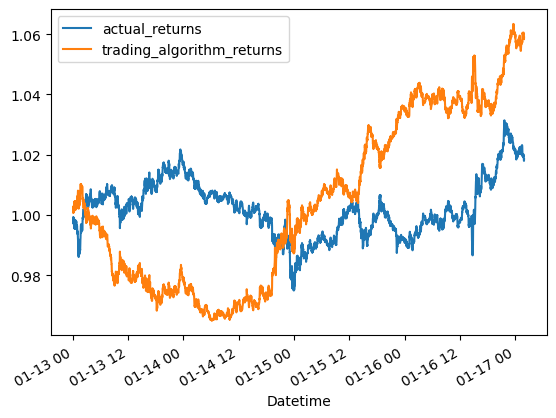

In [218]:
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

In [219]:
# Set the model's file path
import numpy as np

file_path = "project-2.npy"
np.save(file_path, testing_signal_predictions)
